In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [146]:
df.isnull().sum() #checking how many features have null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [148]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [149]:
df["embarked"].isnull().sum()

2

In [150]:
df["embarked"].fillna("S", inplace=True)

In [151]:
df["embarked"].isnull().sum()

0

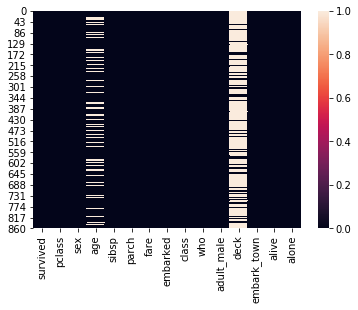

In [152]:
sns.heatmap(df.isnull())

Since age has a lot of null values , so filling it up according to pclass

In [153]:
df["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

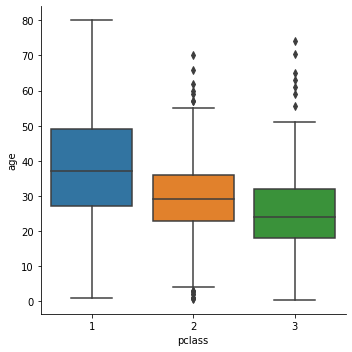

In [154]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

In [155]:
df[df["pclass"]==1]['age'].mean()

38.233440860215055

In [156]:
df[df["pclass"]==2]["age"].mean()

29.87763005780347

In [157]:
df[df["pclass"]==3]["age"].mean()

25.14061971830986

In [158]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return df[df['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return df[df['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return df[df['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [159]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis = 1)

In [160]:
df['age'].isnull().sum() #now there are no null age values

0

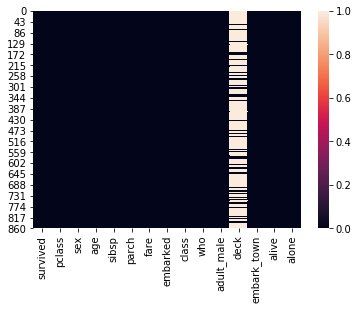

In [161]:
sns.heatmap(df.isnull()) #checking again null features

In [162]:

genders = {'male': 0, 'female': 1}
df['sex'] = df['sex'].map(genders)

who = {'man': 0, 'women': 1, 'child': 2}
df['who'] = df['who'].map(who)

adult_male = {True: 1, False: 0}
df['adult_male'] = df['adult_male'].map(adult_male)

alone = {True: 1, False: 0}
df['alone'] = df['alone'].map(alone)

ports = {'S': 0, 'C': 1, 'Q': 2}
df['embarked'] = df['embarked'].map(ports)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.00000,1,0,7.2500,0,Third,0.0,1,NaN,Southampton,no,0
1,1,1,1,38.00000,1,0,71.2833,1,First,NaN,0,C,Cherbourg,yes,0
2,1,3,1,26.00000,0,0,7.9250,0,Third,NaN,0,NaN,Southampton,yes,1
3,1,1,1,35.00000,1,0,53.1000,0,First,NaN,0,C,Southampton,yes,0
4,0,3,0,35.00000,0,0,8.0500,0,Third,0.0,1,NaN,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00000,0,0,13.0000,0,Second,0.0,1,NaN,Southampton,no,1
887,1,1,1,19.00000,0,0,30.0000,0,First,NaN,0,B,Southampton,yes,1
888,0,3,1,25.14062,1,2,23.4500,0,Third,NaN,0,NaN,Southampton,no,0
889,1,1,0,26.00000,0,0,30.0000,1,First,0.0,1,C,Cherbourg,yes,1


In [163]:
df.drop(labels=['deck', 'embark_town', 'alive', 'class', 'who'], inplace = True, axis = 1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22.00000,1,0,7.2500,0,1,0
1,1,1,1,38.00000,1,0,71.2833,1,0,0
2,1,3,1,26.00000,0,0,7.9250,0,0,1
3,1,1,1,35.00000,1,0,53.1000,0,0,0
4,0,3,0,35.00000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00000,0,0,13.0000,0,1,1
887,1,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,1,25.14062,1,2,23.4500,0,0,0
889,1,1,0,26.00000,0,0,30.0000,1,1,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null int64
age           891 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      891 non-null int64
adult_male    891 non-null int64
alone         891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [165]:
df['fare'] = df['fare'].astype('int')
df['age'] = df['age'].astype('int')
df['pclass'] = df['pclass'].astype('int')

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,1,1
887,1,1,1,19,0,0,30,0,0,1
888,0,3,1,25,1,2,23,0,0,0
889,1,1,0,26,0,0,30,1,1,1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null int64
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null int64
adult_male    891 non-null int64
alone         891 non-null int64
dtypes: int32(3), int64(7)
memory usage: 59.3 KB


In [167]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

# Build Logistic Regression Model

In [169]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [171]:
X=df.drop(labels="survived", axis = 1)
y=df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train.shape, y_train.shape

((596, 9), (596,))

In [172]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8169491525423729


C:\Users\Zenia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Recursive Feature Elimination (RFE)

In [173]:
from sklearn.feature_selection import RFE

In [187]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [188]:
X.shape

(891, 9)

In [189]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [190]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [191]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [192]:
XX = X[X.columns[rfe.support_]]
XX

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1
...,...,...,...,...,...
886,2,0,0,1,1
887,1,0,0,0,1
888,3,1,2,0,0
889,1,0,0,1,1


In [193]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)


In [194]:
X_train.shape

(712, 5)

In [195]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [197]:
model.score(X_test, y_test) # getting better accuracy after RFE

0.8547486033519553

In [198]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [199]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [200]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [201]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [202]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
log loss:  0.3659737372713988
auc:  0.9007246376811595


In [203]:
idx = np.min(np.where(tpr>0.95))
idx

27

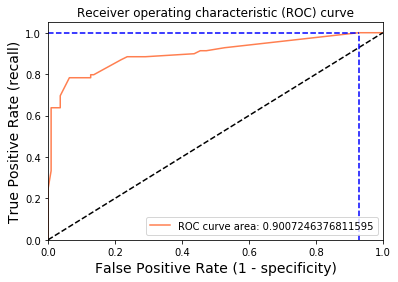

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [204]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))